...

In [762]:
import pandas as pd

In [763]:
pd.options.display.float_format = '{:.2f}'.format

...

In [764]:
df_dofinansowanie = pd.read_csv(
    'umowy_pelna_lista_krajowe.csv',
    encoding='ISO-8859-2',
    converters={'TERYT pe?ny': str},
    thousands=',')

df_dofinansowanie = df_dofinansowanie.loc[df_dofinansowanie['TERYT pe?ny'] != ''].reset_index(drop=True)

df_dofinansowanie['Dofinansowanie UE (PLN)'] = \
    df_dofinansowanie['Dofinansowanie UE (PLN)'].apply(pd.to_numeric)

df_dofinansowanie['Data rozpocz?cia realizacji'] = pd.to_datetime(df_dofinansowanie['Data rozpocz?cia realizacji'])
df_dofinansowanie['Rok rozpocz?cia realizacji'] = df_dofinansowanie['Data rozpocz?cia realizacji'].dt.year

df_dofinansowanie['Data podpisania umowy pierwotnej'] = pd.to_datetime(df_dofinansowanie['Data podpisania umowy pierwotnej'])
df_dofinansowanie['Rok podpisania umowy pierwotnej'] = df_dofinansowanie['Data podpisania umowy pierwotnej'].dt.year

C:\Users\micha\AppData\Local\Temp\ipykernel_24540\3760256257.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df_dofinansowanie = pd.read_csv(


In [765]:
print(df_dofinansowanie['Program operacyjny'].drop_duplicates().values)

['Program Operacyjny Inteligentny Rozwój'
 'Program Operacyjny Infrastruktura i ?rodowisko 2014-2020'
 'Program Operacyjny Polska Cyfrowa'
 'Program Operacyjny Pomoc Techniczna 2014-2020'
 'Program Operacyjny Polska Wschodnia'
 'Program Operacyjny Wiedza Edukacja Rozwój']


In [766]:
# Wybór programu operacyjnego...
# df_dofinansowanie = df_dofinansowanie.loc[df_dofinansowanie['Program operacyjny'] == 'Program Operacyjny Infrastruktura i ?rodowisko 2014-2020'].reset_index(drop=True)


In [767]:
df_dofinansowanie_agg = df_dofinansowanie \
    .groupby(['TERYT pe?ny', 'Program operacyjny', 'Rok rozpocz?cia realizacji'])['Dofinansowanie UE (PLN)'].sum().reset_index()
df_dofinansowanie_agg = df_dofinansowanie_agg \
    .rename(columns={'TERYT pe?ny': 'Kod', 'Rok rozpocz?cia realizacji': 'Rok', 'Program operacyjny': 'Program_operacyjny', 'Dofinansowanie UE (PLN)': 'Suma'})
df_dofinansowanie_agg = df_dofinansowanie_agg \
    .loc[df_dofinansowanie_agg['Kod'].str.len() == 7].reset_index(drop=True)

...

In [768]:
df_podz = pd.read_csv(
    'PODZ_1410_CREL.csv',
    sep=';',
    converters={'Kod': str})
df_podz = df_podz[['Kod', 'Rok', 'Wartosc']]
df_podz = df_podz.loc[df_podz['Kod'].str.endswith(('1', '2', '3'))]
df_podz = df_podz.dropna()
df_podz = df_podz.rename(columns={
    'Wartosc': 'Powierzchnia'})

In [769]:
df_wyna = pd.read_csv(
    'WYNA_2497_CREL.csv',
    sep=';',
    converters={'Kod': str},
    decimal=',')
df_wyna = df_wyna[['Kod', 'Wyszczególnienie', 'Rok', 'Wartosc']]
df_wyna = df_wyna.dropna()
df_wyna = df_wyna.pivot_table(index=['Kod', 'Rok'], columns='Wyszczególnienie', values='Wartosc').reset_index()
df_wyna = df_wyna.rename(columns={
    'ogółem': 'Wynagrodzenie_ogolem',
    'przeciętne miesięczne wynagrodzenia brutto w relacji do średniej krajowej (Polska=100)': 'Wynagrodzenie_w_relacji_do_sredniej'})

In [770]:
df_fina_1 = pd.read_csv(
    'FINA_2622_CREL_1.csv',
    sep=';',
    converters={'Kod': str},
    decimal=',')
df_fina_1 = df_fina_1[['Kod', 'Rodzaje dochodów', 'Rok', 'Wartosc']]
df_fina_1 = df_fina_1.dropna()
df_fina_1 = df_fina_1.pivot_table(index=['Kod', 'Rok'], columns='Rodzaje dochodów', values='Wartosc').reset_index()
df_fina_1 = df_fina_1.rename(columns={
    'dochody podatkowe - podatek leśny': 'Dochody_podatek_lesny',
    'dochody podatkowe - podatek od czynności cywilnoprawnych': 'Dochody_podatek_PCC',
    'dochody podatkowe - podatek od działalności gospodarczej osób fizycznych, opłacany w formie karty podatkowej': 'Dochody_podatek_od_dzialalnosci_gospodarczej',
    'dochody podatkowe - podatek od nieruchomości': 'Dochody_podatek_od_nieruchomosci',
    'dochody podatkowe - podatek od spadków i darowizn': 'Dochody_podatek_od_spadkow',
    'dochody podatkowe - podatek od środków transportowych': 'Dochody_podatek_od_srodkow_transportowych',
    'dochody podatkowe - podatek rolny': 'Dochody_podatek_rolny',
    'dochody podatkowe - ustalone i pobierane na podstawie odrębnych ustaw': 'Dochody_podatek_odrebne_ustawy',
    'razem': 'Dochody_razem'})

df_fina_1

C:\Users\micha\AppData\Local\Temp\ipykernel_24540\1671418303.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_fina_1 = pd.read_csv(


Rodzaje dochodów,Kod,Rok,Dochody_podatek_lesny,Dochody_podatek_PCC,Dochody_podatek_od_dzialalnosci_gospodarczej,Dochody_podatek_od_nieruchomosci,Dochody_podatek_od_spadkow,Dochody_podatek_od_srodkow_transportowych,Dochody_podatek_rolny,Dochody_podatek_odrebne_ustawy,Dochody_razem
0,0201011,2004,NaN,549608.00,NaN,13532989.00,NaN,625159.00,23687.00,NaN,41378568.00
1,0201011,2005,NaN,609855.00,NaN,13667398.00,NaN,700134.00,26634.00,15438121.00,43417443.00
2,0201011,2006,NaN,844223.65,NaN,14633962.72,NaN,747182.64,11683.60,16647124.98,50319253.08
3,0201011,2007,NaN,1344365.01,NaN,14944781.74,NaN,777345.52,19377.36,17436387.93,62025513.24
4,0201011,2008,6799.55,1790135.40,NaN,16089534.56,NaN,836441.10,30823.60,19149551.45,80755930.93
...,...,...,...,...,...,...,...,...,...,...,...
47078,3263011,2018,154462.39,5361951.37,572868.36,108107448.79,437144.83,589658.88,51297.75,115274832.37,261780766.79
47079,3263011,2019,150329.31,6088184.20,468411.51,38527846.59,228886.23,608637.40,64855.15,46137150.39,167638796.15
47080,3263011,2020,156556.52,5125090.74,329522.12,78767466.83,552009.16,558925.68,48689.09,85538260.14,263006955.07
47081,3263011,2021,163778.36,9082482.28,492045.28,78491368.35,947992.83,602586.14,59824.46,89840077.70,252345800.93


In [771]:
df_fina_2 = pd.read_csv(
    'FINA_2622_CREL_2.csv',
    sep=';',
    converters={'Kod': str},
    decimal=',')
df_fina_2 = df_fina_2[['Kod', 'Rodzaje dochodów', 'Rok', 'Wartosc']]
df_fina_2 = df_fina_2.dropna()
df_fina_2 = df_fina_2.pivot_table(index=['Kod', 'Rok'], columns='Rodzaje dochodów', values='Wartosc').reset_index()
df_fina_2 = df_fina_2.rename(columns={
    'dochody z majątku': 'Dochody_z_majatku',
    'dochody z majątku - dochody z najmu i dzierżawy składników majątkowych JST oraz innych umów o podobnym charakterze': 'Dochody_z_najmu_i_dzierzawy',
    'pozostałe dochody - wpływy z usług': 'Dochody_z_uslug',
    'pozostałe dochody - środki na dofinansowanie własnych zadań pozyskane z innych źródeł - inwestycyjne': 'Dochody_dofinansowanie_inwestycyjne',
    'pozostałe dochody - środki na dofinansowanie własnych zadań pozyskane z innych źródeł - razem': 'Dochody_dofinansowanie_razem',
    'udziały w podatkach stanowiących dochody budżetu państwa podatek dochodowy od osób fizycznych': 'Udzialy_w_podatkach_dochodowych_od_osob_fizycznych',
    'udziały w podatkach stanowiących dochody budżetu państwa podatek dochodowy od osób prawnych': 'Udzialy_w_podatkach_dochodowych_od_osob_prywatnych',
    'udziały w podatkach stanowiących dochody budżetu państwa razem': 'Udzialy_w_podatkach_dochodowych_razem',
    'wpływy z innych lokalnych opłat pobieranych przez jednostki samorządu terytorialnego na podstawie odrębnych ustaw': 'Wplywy_z_innych_lokalnych_oplat',
    'wpływy z opłaty eksploatacyjnej': 'Wplywy_z_oplaty_eksploatacyjnej',
    'wpływy z opłaty skarbowej': 'Wplywy_z_oplaty_skarbowej',
    'wpływy z opłaty targowej': 'Wplywy_z_oplaty_targowej'})

df_fina_2

C:\Users\micha\AppData\Local\Temp\ipykernel_24540\2161929356.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_fina_2 = pd.read_csv(


Rodzaje dochodów,Kod,Rok,Dochody_z_majatku,Dochody_z_najmu_i_dzierzawy,Dochody_z_uslug,Dochody_dofinansowanie_inwestycyjne,Dochody_dofinansowanie_razem,Udzialy_w_podatkach_dochodowych_od_osob_fizycznych,Udzialy_w_podatkach_dochodowych_od_osob_prywatnych,Udzialy_w_podatkach_dochodowych_razem,Wplywy_z_innych_lokalnych_oplat,Wplywy_z_oplaty_eksploatacyjnej,Wplywy_z_oplaty_skarbowej,Wplywy_z_oplaty_targowej
0,0201011,2004,5344205.00,NaN,184307.00,NaN,519209.00,13285456.00,1065169.00,14350625.00,44200.00,NaN,1209998.00,NaN
1,0201011,2005,4560489.00,NaN,96462.00,NaN,9024183.00,15985331.00,1170863.00,17156194.00,42840.00,NaN,1282943.00,NaN
2,0201011,2006,8528727.69,NaN,231470.96,8752288.98,8864860.57,18101668.00,1048115.83,19149783.83,37365.00,NaN,1203990.73,NaN
3,0201011,2007,15042480.34,9219682.12,339654.15,18153240.30,18438743.21,21785308.00,1336702.02,23122010.02,78798.51,NaN,1228704.53,NaN
4,0201011,2008,22797881.07,9546379.31,787256.69,5046691.69,5182137.79,23974587.00,1532633.44,25507220.44,83882.94,NaN,1364245.93,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47078,3263011,2018,16419859.31,4261374.83,1996824.80,25285.92,237485.34,52799183.00,2690098.17,55489281.17,10458871.30,4684.54,434077.88,608625.90
47079,3263011,2019,8844350.07,4324758.68,2187576.47,0.00,225831.84,55319040.00,2770684.17,58089724.17,11369287.11,3456.95,415686.53,610059.50
47080,3263011,2020,13485033.97,6159923.01,1917372.55,21002107.00,21192313.05,53739656.00,3144444.38,56884100.38,12281916.71,5157.50,355201.29,507341.00
47081,3263011,2021,16928500.75,7582499.62,4110105.72,888293.63,1072910.83,63936763.00,3975531.95,67912294.95,17127683.55,27746.70,416473.03,0.00


In [772]:
df_ludn_1 = pd.read_csv(  # ogolem
    'LUDN_1342_CREL_1.csv',
    sep=';',
    converters={'Kod': str},
    decimal=',')
df_ludn_1 = df_ludn_1[['Kod', 'Wiek', 'Rok', 'Wartosc']]
df_ludn_1 = df_ludn_1.dropna()
df_ludn_1 = df_ludn_1.loc[df_ludn_1['Kod'].str.endswith(('1', '2', '3'))]
df_ludn_1 = df_ludn_1.pivot_table(index=['Kod', 'Rok'], columns='Wiek', values='Wartosc').reset_index()
df_ludn_1 = df_ludn_1.rename(columns={
    'ogółem': 'Ludnosc_ogolem',
    'w wieku poprodukcyjnym': 'Ludnosc_w_wieku_poprodukcyjnym',
    'w wieku produkcyjnym': 'Ludnosc_w_wieku_produkcyjnym',
    'w wieku produkcyjnym mobilnym': 'Ludnosc_w_wieku_produkcyjnym_mobilnym',
    'w wieku produkcyjnym niemobilnym': 'Ludnosc_w_wieku_produkcyjnym_niemobilnym',
    'w wieku przedprodukcyjnym': 'Ludnosc_w_wieku_przedprodukcyjnym'})

df_ludn_1

Wiek,Kod,Rok,Ludnosc_ogolem,Ludnosc_w_wieku_poprodukcyjnym,Ludnosc_w_wieku_produkcyjnym,Ludnosc_w_wieku_produkcyjnym_mobilnym,Ludnosc_w_wieku_produkcyjnym_niemobilnym,Ludnosc_w_wieku_przedprodukcyjnym
0,0201011,2010,40309.00,7683.00,26085.00,15183.00,10902.00,6541.00
1,0201011,2011,40119.00,8020.00,25647.00,15047.00,10600.00,6452.00
2,0201011,2012,39851.00,8392.00,25160.00,14932.00,10228.00,6299.00
3,0201011,2013,39603.00,8678.00,24720.00,14784.00,9936.00,6205.00
4,0201011,2014,39464.00,8971.00,24307.00,14645.00,9662.00,6186.00
...,...,...,...,...,...,...,...,...
32210,3263011,2018,40910.00,10472.00,24549.00,14683.00,9866.00,5889.00
32211,3263011,2019,40888.00,10788.00,24209.00,14429.00,9780.00,5891.00
32212,3263011,2020,40326.00,10962.00,23544.00,13798.00,9746.00,5820.00
32213,3263011,2021,39834.00,11050.00,22976.00,13277.00,9699.00,5808.00


In [773]:
df_ludn_2 = pd.read_csv(  # mezczyzni
    'LUDN_1342_CREL_2.csv',
    sep=';',
    converters={'Kod': str},
    decimal=',')
df_ludn_2 = df_ludn_2[['Kod', 'Wiek', 'Rok', 'Wartosc']]
df_ludn_2 = df_ludn_2.dropna()
df_ludn_2 = df_ludn_2.loc[df_ludn_2['Kod'].str.endswith(('1', '2', '3'))]
df_ludn_2 = df_ludn_2.pivot_table(index=['Kod', 'Rok'], columns='Wiek', values='Wartosc').reset_index()
df_ludn_2 = df_ludn_2.rename(columns={
    'ogółem': 'Ludnosc_mezczyzni',
    'w wieku poprodukcyjnym': 'Ludnosc_mezczyzni_w_wieku_poprodukcyjnym',
    'w wieku produkcyjnym': 'Ludnosc_mezczyzni_w_wieku_produkcyjnym',
    'w wieku produkcyjnym mobilnym': 'Ludnosc_mezczyzni_w_wieku_produkcyjnym_mobilnym',
    'w wieku produkcyjnym niemobilnym': 'Ludnosc_mezczyzni_w_wieku_produkcyjnym_niemobilnym',
    'w wieku przedprodukcyjnym': 'Ludnosc_mezczyzni_w_wieku_przedprodukcyjnym'})

df_ludn_2

Wiek,Kod,Rok,Ludnosc_mezczyzni,Ludnosc_mezczyzni_w_wieku_poprodukcyjnym,Ludnosc_mezczyzni_w_wieku_produkcyjnym,Ludnosc_mezczyzni_w_wieku_produkcyjnym_mobilnym,Ludnosc_mezczyzni_w_wieku_produkcyjnym_niemobilnym,Ludnosc_mezczyzni_w_wieku_przedprodukcyjnym
0,0201011,2010,19085.00,2153.00,13535.00,7720.00,5815.00,3397.00
1,0201011,2011,18985.00,2222.00,13398.00,7647.00,5751.00,3365.00
2,0201011,2012,18859.00,2370.00,13238.00,7611.00,5627.00,3251.00
3,0201011,2013,18737.00,2477.00,13028.00,7501.00,5527.00,3232.00
4,0201011,2014,18640.00,2620.00,12832.00,7442.00,5390.00,3188.00
...,...,...,...,...,...,...,...,...
32210,3263011,2018,19690.00,3501.00,13202.00,7547.00,5655.00,2987.00
32211,3263011,2019,19683.00,3644.00,13044.00,7417.00,5627.00,2995.00
32212,3263011,2020,19356.00,3749.00,12617.00,6986.00,5631.00,2990.00
32213,3263011,2021,19096.00,3852.00,12267.00,6747.00,5520.00,2977.00


In [774]:
df_ludn_3 = pd.read_csv(  # kobiety
    'LUDN_1342_CREL_3.csv',
    sep=';',
    converters={'Kod': str},
    decimal=',')
df_ludn_3 = df_ludn_3[['Kod', 'Wiek', 'Rok', 'Wartosc']]
df_ludn_3 = df_ludn_3.dropna()
df_ludn_3 = df_ludn_3.loc[df_ludn_3['Kod'].str.endswith(('1', '2', '3'))]
df_ludn_3 = df_ludn_3.pivot_table(index=['Kod', 'Rok'], columns='Wiek', values='Wartosc').reset_index()
df_ludn_3 = df_ludn_3.rename(columns={
    'ogółem': 'Ludnosc_kobiety',
    'w wieku poprodukcyjnym': 'Ludnosc_kobiety_w_wieku_poprodukcyjnym',
    'w wieku produkcyjnym': 'Ludnosc_kobiety_w_wieku_produkcyjnym',
    'w wieku produkcyjnym mobilnym': 'Ludnosc_kobiety_w_wieku_produkcyjnym_mobilnym',
    'w wieku produkcyjnym niemobilnym': 'Ludnosc_kobiety_w_wieku_produkcyjnym_niemobilnym',
    'w wieku przedprodukcyjnym': 'Ludnosc_kobiety_w_wieku_przedprodukcyjnym'})

df_ludn_3

Wiek,Kod,Rok,Ludnosc_kobiety,Ludnosc_kobiety_w_wieku_poprodukcyjnym,Ludnosc_kobiety_w_wieku_produkcyjnym,Ludnosc_kobiety_w_wieku_produkcyjnym_mobilnym,Ludnosc_kobiety_w_wieku_produkcyjnym_niemobilnym,Ludnosc_kobiety_w_wieku_przedprodukcyjnym
0,0201011,2010,21224.00,5530.00,12550.00,7463.00,5087.00,3144.00
1,0201011,2011,21134.00,5798.00,12249.00,7400.00,4849.00,3087.00
2,0201011,2012,20992.00,6022.00,11922.00,7321.00,4601.00,3048.00
3,0201011,2013,20866.00,6201.00,11692.00,7283.00,4409.00,2973.00
4,0201011,2014,20824.00,6351.00,11475.00,7203.00,4272.00,2998.00
...,...,...,...,...,...,...,...,...
32210,3263011,2018,21220.00,6971.00,11347.00,7136.00,4211.00,2902.00
32211,3263011,2019,21205.00,7144.00,11165.00,7012.00,4153.00,2896.00
32212,3263011,2020,20970.00,7213.00,10927.00,6812.00,4115.00,2830.00
32213,3263011,2021,20738.00,7198.00,10709.00,6530.00,4179.00,2831.00


In [775]:
df_ludn_4 = pd.read_csv(
    'LUDN_2425_CREL.csv',
    sep=';',
    converters={'Kod': str},
    decimal=',')
df_ludn_4 = df_ludn_4[['Kod', 'Wskaźniki', 'Rok', 'Wartosc']]
df_ludn_4 = df_ludn_4.dropna()
df_ludn_4 = df_ludn_4.loc[df_ludn_4['Kod'].str.endswith(('1', '2', '3'))]
df_ludn_4 = df_ludn_4.pivot_table(index=['Kod', 'Rok'], columns='Wskaźniki', values='Wartosc').reset_index()
df_ludn_4 = df_ludn_4.rename(columns={
    'gęstość zaludnienia powierzchni zabudowanej i zurbanizowanej (osoby/km2)': 'Gestosc_zaludnienia',
    'ludność na 1 km2': 'Ludnosc_na_1_km2',
    'ludność w tysiącach': 'Ludnosc',
    'ludność w tysiącach kobiety': 'Ludnosc_kobiety',
    'ludność w tysiącach mężczyźni': 'Ludnosc_mezczyzni',
    'wskaźnik urbanizacji': 'Wskaznik_urbanizacji',
    'zmiana liczby ludności na 1000 mieszkańców': 'Zmiana_liczby_ludnosci'})

df_ludn_4 = df_ludn_4[[
    'Kod',
    'Rok',
    # 'Gestosc_zaludnienia',
    'Ludnosc_na_1_km2',
    'Ludnosc',
    'Ludnosc_kobiety',
    'Ludnosc_mezczyzni',
    'Wskaznik_urbanizacji',
    'Zmiana_liczby_ludnosci']]

In [776]:
df_ludn_5 = pd.read_csv(
    'LUDN_1355_CREL.csv',
    sep=';',
    converters={'Kod': str},
    decimal=',')
df_ludn_5['Kierunki migracji'] = df_ludn_5['Kierunki migracji'] + df_ludn_5['Płeć']
df_ludn_5 = df_ludn_5[['Kod', 'Kierunki migracji', 'Rok', 'Wartosc']]
df_ludn_5 = df_ludn_5.dropna()
df_ludn_5 = df_ludn_5.loc[df_ludn_5['Kod'].str.endswith(('1', '2', '3'))]
df_ludn_5 = df_ludn_5.pivot_table(index=['Kod', 'Rok'], columns='Kierunki migracji', values='Wartosc').reset_index()
df_ludn_5 = df_ludn_5.rename(columns={
    'saldo migracji na 1000 ludnościogółem': 'Saldo_migracji_na_1000_ludnosci',
    'saldo migracjiogółem': 'Saldo_migracji',
    'wymeldowania do miastkobiety': 'Wymeldowania_do_miast_kobiety',
    'wymeldowania do miastmężczyźni': 'Wymeldowania_do_miast_mezczyzni',
    'wymeldowania do miastogółem': 'Wymeldowania_do_miast_ogolem',
    'wymeldowania na wieśkobiety': 'Wymeldowania_na_wies_kobiety',
    'wymeldowania na wieśmężczyźni': 'Wymeldowania_na_wies_mezczyzni',
    'wymeldowania na wieśogółem': 'Wymeldowania_na_wies_ogolem',
    'wymeldowania ogółemkobiety': 'Wymeldowania_kobiety',
    'wymeldowania ogółemmężczyźni': 'Wymeldowania_mezczyzni',
    'wymeldowania ogółemogółem': 'Wymeldowania_ogolem',
    'wymeldowania za granicękobiety': 'Wymeldowania_za_granice_kobiety',
    'wymeldowania za granicęmężczyźni': 'Wymeldowania_za_granice_mezczyzni',
    'wymeldowania za granicęogółem': 'Wymeldowania_za_granice_ogolem',
    'zameldowania ogółemkobiety': 'Zameldowania_kobiety',
    'zameldowania ogółemmężczyźni': 'Zameldowania_mezczyzni',
    'zameldowania ogółemogółem': 'Zameldowania_ogolem',
    'zameldowania z miastkobiety': 'Zameldowania_z_miast_kobiety',
    'zameldowania z miastmężczyźni': 'Zameldowania_z_miast_mezczyzni',
    'zameldowania z miastogółem': 'Zameldowania_z_miast_ogolem',
    'zameldowania ze wsikobiety': 'Zameldowania_ze_wsi_kobiety',
    'zameldowania ze wsimężczyźni': 'Zameldowania_ze_wsi_mezczyzni',
    'zameldowania ze wsiogółem': 'Zameldowania_ze_wsi_ogolem'})

df_ludn_5

Kierunki migracji,Kod,Rok,Saldo_migracji_na_1000_ludnosci,Saldo_migracji,Wymeldowania_do_miast_kobiety,Wymeldowania_do_miast_mezczyzni,Wymeldowania_do_miast_ogolem,Wymeldowania_na_wies_kobiety,Wymeldowania_na_wies_mezczyzni,Wymeldowania_na_wies_ogolem,...,Wymeldowania_za_granice_ogolem,Zameldowania_kobiety,Zameldowania_mezczyzni,Zameldowania_ogolem,Zameldowania_z_miast_kobiety,Zameldowania_z_miast_mezczyzni,Zameldowania_z_miast_ogolem,Zameldowania_ze_wsi_kobiety,Zameldowania_ze_wsi_mezczyzni,Zameldowania_ze_wsi_ogolem
0,0201011,2010,-3.70,-151.00,108.00,96.00,204.00,170.00,177.00,347.00,...,0.00,223.00,177.00,400.00,70.00,52.00,122.00,147.00,118.00,265.00
1,0201011,2011,-4.60,-186.00,111.00,99.00,210.00,170.00,157.00,327.00,...,1.00,196.00,156.00,352.00,67.00,59.00,126.00,125.00,94.00,219.00
2,0201011,2012,-3.70,-149.00,100.00,92.00,192.00,147.00,153.00,300.00,...,9.00,197.00,155.00,352.00,78.00,61.00,139.00,116.00,92.00,208.00
3,0201011,2013,-4.80,-191.00,115.00,88.00,203.00,182.00,158.00,340.00,...,24.00,211.00,165.00,376.00,83.00,58.00,141.00,128.00,101.00,229.00
4,0201011,2014,-4.20,-167.00,100.00,86.00,186.00,168.00,161.00,329.00,...,41.00,196.00,193.00,389.00,71.00,71.00,142.00,125.00,121.00,246.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32210,3263011,2018,1.70,71.00,125.00,152.00,277.00,40.00,66.00,106.00,...,NaN,245.00,240.00,485.00,156.00,138.00,294.00,73.00,79.00,152.00
32211,3263011,2019,3.40,141.00,151.00,116.00,267.00,48.00,53.00,101.00,...,NaN,273.00,259.00,532.00,179.00,149.00,328.00,71.00,90.00,161.00
32212,3263011,2020,3.20,129.00,98.00,99.00,197.00,40.00,44.00,84.00,...,NaN,226.00,203.00,429.00,159.00,131.00,290.00,52.00,53.00,105.00
32213,3263011,2021,-1.40,-55.00,122.00,126.00,248.00,63.00,50.00,113.00,...,NaN,171.00,168.00,339.00,109.00,95.00,204.00,49.00,46.00,95.00


In [777]:
df_tury = pd.read_csv(
    'TURY_2017_CREL.csv',
    sep=';',
    converters={'Kod': str},
    decimal=',')
df_tury = df_tury[['Kod', 'Turystyczne obiekty noclegowe', 'Rok', 'Wartosc']]
df_tury = df_tury.dropna()
df_tury = df_tury.pivot_table(index=['Kod', 'Rok'], columns='Turystyczne obiekty noclegowe', values='Wartosc').reset_index()
df_tury = df_tury.rename(columns={
    'miejsca noclegowe całoroczne lipiec': 'Miejsca_noclegowe_caloroczne',
    'miejsca noclegowe ogółem lipiec': 'Miejsca_noclegowe_ogolem',
    'obiekty całoroczne lipiec': 'Obiekty_caloroczne',
    'obiekty ogółem lipiec': 'Obiekty_ogolem',
    'turyści (korzystający) ogółem styczeń-grudzień': 'Turysci_ogolem',
    'turyści zagraniczni (korzystający) - nierezydenci styczeń-grudzień': 'Turysci_zagraniczni'})

df_tury

Turystyczne obiekty noclegowe,Kod,Rok,Miejsca_noclegowe_caloroczne,Miejsca_noclegowe_ogolem,Obiekty_caloroczne,Obiekty_ogolem,Turysci_ogolem,Turysci_zagraniczni
0,0201011,2010,265.00,265.00,7.00,7.00,16427.00,5173.00
1,0201011,2011,267.00,267.00,7.00,7.00,13134.00,4486.00
2,0201011,2012,295.00,295.00,8.00,8.00,13159.00,4856.00
3,0201011,2013,293.00,293.00,8.00,8.00,11914.00,4701.00
4,0201011,2014,292.00,292.00,8.00,8.00,12398.00,3919.00
...,...,...,...,...,...,...,...,...
34697,3263011,2018,9757.00,11717.00,76.00,107.00,NaN,NaN
34698,3263011,2019,9963.00,11805.00,74.00,103.00,NaN,NaN
34699,3263011,2020,9673.00,11557.00,68.00,97.00,NaN,NaN
34700,3263011,2021,8731.00,10551.00,66.00,92.00,NaN,NaN


In [778]:
df_ryne = pd.read_csv(
    'RYNE_3733_CREL.csv',
    sep=';',
    converters={'Kod': str},
    decimal=',')
df_ryne = df_ryne[['Kod', 'Bezrobotni', 'Rok', 'Wartosc']]
df_ryne = df_ryne.dropna()
df_ryne = df_ryne.pivot_table(index=['Kod', 'Rok'], columns='Bezrobotni', values='Wartosc').reset_index()
df_ryne = df_ryne.rename(columns={
    'do 25 roku życia': 'Bezrobotni_do_25_roku_zycia',
    'do 30 roku życia': 'Bezrobotni_do_30_roku_zycia',
    'długotrwale bezrobotni': 'Dlugotrwale_bezrobotni',
    'kobiety': 'Bezrobotne_kobiety',
    'mężczyźni': 'Bezrobotni_mezczyzni',
    'ogółem': 'Bezrobotni_ogolem',
    'powyżej 50 roku życia': 'Bezrobotni_powyzej_50_roku_zycia'})

df_ryne

Bezrobotni,Kod,Rok,Bezrobotni_do_25_roku_zycia,Bezrobotni_do_30_roku_zycia,Dlugotrwale_bezrobotni,Bezrobotne_kobiety,Bezrobotni_mezczyzni,Bezrobotni_ogolem,Bezrobotni_powyzej_50_roku_zycia
0,0201011,2011,284.00,NaN,819.50,900.50,818.00,1718.50,486.50
1,0201011,2012,293.00,NaN,756.50,894.50,888.00,1782.50,498.50
2,0201011,2013,253.50,NaN,788.00,869.50,874.00,1743.50,521.00
3,0201011,2014,172.50,NaN,651.50,648.50,667.50,1316.00,402.00
4,0201011,2015,107.50,238.00,434.50,504.00,518.50,1022.50,359.00
...,...,...,...,...,...,...,...,...,...
48530,3263011,2019,27.50,66.00,226.50,272.50,221.00,493.50,181.00
48531,3263011,2020,56.00,142.00,239.50,390.00,361.50,751.50,250.00
48532,3263011,2021,34.50,88.00,260.50,295.00,341.00,636.00,239.50
48533,3263011,2022,31.50,72.00,199.00,211.50,270.50,482.00,182.50


...

In [779]:
df_data = df_dofinansowanie_agg.copy()
print(len(df_data))

13451


In [780]:
wojewodztwo_dictionary = {
'02': 'Dolnoslaskie',
'04': 'Kujawsko_Pomorskie',
'06': 'Lubelskie',
'08': 'Lubuskie',
'10': 'Lodzkie',
'12': 'Malopolskie',
'14': 'Mazowieckie',
'16': 'Opolskie',
'18': 'Podkarpackie',
'20': 'Podlaskie',
'22': 'Pomorskie',
'24': 'Slaskie',
'26': 'Swietokrzyskie',
'28': 'Warminsko_Mazurskie',
'30': 'Wielkopolskie',
'32': 'Zachodniopomorskie'}

df_data = pd.concat([df_data, pd.get_dummies(df_data['Kod'].apply(lambda x: wojewodztwo_dictionary.get(x[:2], None)), prefix='Wojewodztwo').astype(int)], axis=1)

In [781]:
rodzaj_gminy_dictionary = {
'1': 'Gmina_miejska',
'2': 'Gmina_wiejska',
'3': 'Gmina_miejsko_wiejska'}

df_data = pd.concat([df_data, pd.get_dummies(df_data['Kod'].apply(lambda x: rodzaj_gminy_dictionary.get(x[-1], None))).astype(int)], axis=1)

In [782]:
df_data = df_data.merge(df_podz, left_on=[df_data['Kod'].str.slice(stop=-1), 'Rok'], right_on=[df_podz['Kod'].str.slice(stop=-1), 'Rok'], how='left', suffixes=(None, '_podz'))
df_data = df_data.drop(['key_0', 'Kod_podz'], axis=1)
print(len(df_data))

13451


In [783]:
df_data = df_data.merge(df_wyna, left_on=[df_data['Kod'].str.slice(stop=-3), 'Rok'], right_on=[df_wyna['Kod'].str.slice(stop=-3), 'Rok'], how='left', suffixes=(None, '_wyna'))
df_data = df_data.drop(['key_0', 'Kod_wyna'], axis=1)
print(len(df_data))

13451


In [784]:
df_data = df_data.merge(df_fina_1, left_on=[df_data['Kod'].str.slice(stop=-1), 'Rok'], right_on=[df_fina_1['Kod'].str.slice(stop=-1), 'Rok'], how='left', suffixes=(None, '_fina_1'))
df_data = df_data.drop(['key_0', 'Kod_fina_1'], axis=1)
print(len(df_data))

df_data = df_data.merge(df_fina_2, left_on=[df_data['Kod'].str.slice(stop=-1), 'Rok'], right_on=[df_fina_2['Kod'].str.slice(stop=-1), 'Rok'], how='left', suffixes=(None, '_fina_2'))
df_data = df_data.drop(['key_0', 'Kod_fina_2'], axis=1)
print(len(df_data))

13451
13451


In [785]:
# df_data = df_data.merge(df_ludn_1, left_on=['Kod', 'Rok'], right_on=['Kod', 'Rok'], how='left', suffixes=(None, '_ludn_1'))
df_data = df_data.merge(df_ludn_1, left_on=[df_data['Kod'].str.slice(stop=-1), 'Rok'], right_on=[df_ludn_1['Kod'].str.slice(stop=-1), 'Rok'], how='left', suffixes=(None, '_ludn_1'))
df_data = df_data.drop(['key_0', 'Kod_ludn_1'], axis=1)
print(len(df_data))

# df_data = df_data.merge(df_ludn_2, left_on=['Kod', 'Rok'], right_on=['Kod', 'Rok'], how='left', suffixes=(None, '_ludn_2'))
df_data = df_data.merge(df_ludn_2, left_on=[df_data['Kod'].str.slice(stop=-1), 'Rok'], right_on=[df_ludn_2['Kod'].str.slice(stop=-1), 'Rok'], how='left', suffixes=(None, '_ludn_2'))
df_data = df_data.drop(['key_0', 'Kod_ludn_2'], axis=1)
print(len(df_data))

# df_data = df_data.merge(df_ludn_3, left_on=['Kod', 'Rok'], right_on=['Kod', 'Rok'], how='left', suffixes=(None, '_ludn_3'))
df_data = df_data.merge(df_ludn_3, left_on=[df_data['Kod'].str.slice(stop=-1), 'Rok'], right_on=[df_ludn_3['Kod'].str.slice(stop=-1), 'Rok'], how='left', suffixes=(None, '_ludn_3'))
df_data = df_data.drop(['key_0', 'Kod_ludn_3'], axis=1)
print(len(df_data))

# df_data = df_data.merge(df_ludn_4, left_on=['Kod', 'Rok'], right_on=['Kod', 'Rok'], how='left', suffixes=(None, '_ludn_4'))
df_data = df_data.merge(df_ludn_4, left_on=[df_data['Kod'].str.slice(stop=-1), 'Rok'], right_on=[df_ludn_4['Kod'].str.slice(stop=-1), 'Rok'], how='left', suffixes=(None, '_ludn_4'))
df_data = df_data.drop(['key_0', 'Kod_ludn_4'], axis=1)
print(len(df_data))

# df_data = df_data.merge(df_ludn_5, left_on=['Kod', 'Rok'], right_on=['Kod', 'Rok'], how='left', suffixes=(None, '_ludn_5'))
df_data = df_data.merge(df_ludn_5, left_on=[df_data['Kod'].str.slice(stop=-1), 'Rok'], right_on=[df_ludn_5['Kod'].str.slice(stop=-1), 'Rok'], how='left', suffixes=(None, '_ludn_5'))
df_data = df_data.drop(['key_0', 'Kod_ludn_5'], axis=1)
print(len(df_data))

# df_data['Kod'].value_counts()

13451
13451
13451
13451
13451


In [786]:
df_data = df_data.merge(df_tury, left_on=['Kod', 'Rok'], right_on=['Kod', 'Rok'], how='left', suffixes=(None, '_tury'))
# df_data = df_data.drop(['key_0', 'Kod_tury'], axis=1)
print(len(df_data))

13451


In [787]:
df_data = df_data.merge(df_ryne, left_on=['Kod', 'Rok'], right_on=['Kod', 'Rok'], how='left', suffixes=(None, '_ryne'))
# df_data = df_data.drop(['key_0', 'Kod_ryne'], axis=1)
print(len(df_data))

13451


In [788]:
df_data['Gestosc_zaludnienia'] = df_data['Ludnosc'] / df_data['Powierzchnia']

df_data['Gestosc_zaludnienia'].mean()

0.44252452388990926

In [789]:
df_data.isna().sum()

Kod                                   0
Program_operacyjny                    0
Rok                                   0
Suma                                  0
Wojewodztwo_Dolnoslaskie              0
                                   ... 
Bezrobotne_kobiety                  280
Bezrobotni_mezczyzni                280
Bezrobotni_ogolem                   280
Bezrobotni_powyzej_50_roku_zycia    280
Gestosc_zaludnienia                  97
Length: 108, dtype: int64

In [790]:
# # df_data[[
# #     'Miejsca_noclegowe_caloroczne',
# #     'Miejsca_noclegowe_ogolem',
# #     'Obiekty_caloroczne',
# #     'Obiekty_ogolem',
# #     'Turysci_ogolem',
# #     'Turysci_zagraniczni']] = df_data[[
# #         'Miejsca_noclegowe_caloroczne',
# #         'Miejsca_noclegowe_ogolem',
# #         'Obiekty_caloroczne',
# #         'Obiekty_ogolem',
# #         'Turysci_ogolem',
# #         'Turysci_zagraniczni']].fillna(0)
# df_data.drop(columns=[
#     'Program_operacyjny',
#     'Wymeldowania_za_granice_kobiety',
#     'Wymeldowania_za_granice_mezczyzni',
#     'Wymeldowania_za_granice_ogolem',
#     'Bezrobotni_do_30_roku_zycia',
    
#     'Wojewodztwo_Dolnoslaskie',         # 43
#     'Wojewodztwo_Kujawsko_Pomorskie',   # 44
#     'Wojewodztwo_Lubelskie',            # 45
#     'Wojewodztwo_Lubuskie',             # 46
#     'Wojewodztwo_Lodzkie',              # 47
#     'Wojewodztwo_Malopolskie',          # 48
#     'Wojewodztwo_Mazowieckie',          # 49
#     'Wojewodztwo_Opolskie',             # 50
#     'Wojewodztwo_Podkarpackie',         # 51
#     'Wojewodztwo_Podlaskie',            # 52
#     'Wojewodztwo_Pomorskie',            # 53
#     'Wojewodztwo_Slaskie',              # 54
#     'Wojewodztwo_Swietokrzyskie',       # 55
#     'Wojewodztwo_Warminsko_Mazurskie',  # 56
#     'Wojewodztwo_Wielkopolskie',        # 57
#     'Wojewodztwo_Zachodniopomorskie',   # 58
#     'Gmina_miejska',                    # 98
#     'Gmina_miejsko_wiejska',            # 99
#     'Gmina_wiejska',
#     'Wynagrodzenie_ogolem','Wynagrodzenie_w_relacji_do_sredniej','Dochody_podatek_lesny','Dochody_podatek_PCC','Dochody_podatek_od_dzialalnosci_gospodarczej','Dochody_podatek_od_nieruchomosci',
#     'Dochody_podatek_od_spadkow','Dochody_podatek_od_srodkow_transportowych','Dochody_podatek_rolny','Dochody_podatek_odrebne_ustawy','Dochody_razem','Dochody_z_majatku',
#     'Dochody_z_najmu_i_dzierzawy','Dochody_z_uslug','Dochody_dofinansowanie_inwestycyjne','Dochody_dofinansowanie_razem','Udzialy_w_podatkach_dochodowych_od_osob_fizycznych','Udzialy_w_podatkach_dochodowych_od_osob_prywatnych',
#     'Miejsca_noclegowe_caloroczne',
#     'Miejsca_noclegowe_ogolem',
#     'Obiekty_caloroczne',
#     'Obiekty_ogolem',
#     'Turysci_ogolem',
#     'Turysci_zagraniczni',
#     'Udzialy_w_podatkach_dochodowych_razem','Wplywy_z_innych_lokalnych_oplat','Wplywy_z_oplaty_eksploatacyjnej','Wplywy_z_oplaty_skarbowej','Wplywy_z_oplaty_targowej'], inplace=True, errors='ignore')

# df_data[(df_data.isna().any(axis=1)) & (df_data['Rok'] != 2023)].columns  # ['Rok'].drop_duplicates().reset_index(drop=True)

In [791]:
# df_data['Suma'] = df_data['Suma'] / df_data['Ludnosc']

...

In [792]:
# Usunięcie niepotrzebnych kolumn...
df_data.drop(columns=[
    # 'Program_operacyjny',
    'Wymeldowania_za_granice_kobiety',
    'Wymeldowania_za_granice_mezczyzni',
    'Wymeldowania_za_granice_ogolem',
    'Bezrobotni_do_30_roku_zycia'], inplace=True, errors='ignore')

df_data.to_csv('dane1.csv', index=False)

for c in df_data.columns:
    print(c)

Kod
Program_operacyjny
Rok
Suma
Wojewodztwo_Dolnoslaskie
Wojewodztwo_Kujawsko_Pomorskie
Wojewodztwo_Lodzkie
Wojewodztwo_Lubelskie
Wojewodztwo_Lubuskie
Wojewodztwo_Malopolskie
Wojewodztwo_Mazowieckie
Wojewodztwo_Opolskie
Wojewodztwo_Podkarpackie
Wojewodztwo_Podlaskie
Wojewodztwo_Pomorskie
Wojewodztwo_Slaskie
Wojewodztwo_Swietokrzyskie
Wojewodztwo_Warminsko_Mazurskie
Wojewodztwo_Wielkopolskie
Wojewodztwo_Zachodniopomorskie
Gmina_miejska
Gmina_miejsko_wiejska
Gmina_wiejska
Powierzchnia
Wynagrodzenie_ogolem
Wynagrodzenie_w_relacji_do_sredniej
Dochody_podatek_lesny
Dochody_podatek_PCC
Dochody_podatek_od_dzialalnosci_gospodarczej
Dochody_podatek_od_nieruchomosci
Dochody_podatek_od_spadkow
Dochody_podatek_od_srodkow_transportowych
Dochody_podatek_rolny
Dochody_podatek_odrebne_ustawy
Dochody_razem
Dochody_z_majatku
Dochody_z_najmu_i_dzierzawy
Dochody_z_uslug
Dochody_dofinansowanie_inwestycyjne
Dochody_dofinansowanie_razem
Udzialy_w_podatkach_dochodowych_od_osob_fizycznych
Udzialy_w_podatkach_d

In [793]:
s = df_data.isna().sum()

In [794]:
s[s > 0]

Wynagrodzenie_ogolem                             97
Wynagrodzenie_w_relacji_do_sredniej              97
Dochody_podatek_lesny                            97
Dochody_podatek_PCC                              97
Dochody_podatek_od_dzialalnosci_gospodarczej     97
                                               ... 
Bezrobotne_kobiety                              280
Bezrobotni_mezczyzni                            280
Bezrobotni_ogolem                               280
Bezrobotni_powyzej_50_roku_zycia                280
Gestosc_zaludnienia                              97
Length: 80, dtype: int64

...

In [795]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree, export_text
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

df_data[[
    'Miejsca_noclegowe_caloroczne',
    'Miejsca_noclegowe_ogolem',
    'Obiekty_caloroczne',
    'Obiekty_ogolem',
    'Turysci_ogolem',
    'Turysci_zagraniczni']] = df_data[[
        'Miejsca_noclegowe_caloroczne',
        'Miejsca_noclegowe_ogolem',
        'Obiekty_caloroczne',
        'Obiekty_ogolem',
        'Turysci_ogolem',
        'Turysci_zagraniczni']].fillna(0)

feature_names = [
    'Powierzchnia',                                        # 1
    'Wynagrodzenie_ogolem',                                # 2
    'Wynagrodzenie_w_relacji_do_sredniej',                 # 3
    'Dochody_podatek_lesny',                               # 4
    'Dochody_podatek_PCC',                                 # 5
    'Dochody_podatek_od_dzialalnosci_gospodarczej',        # 6
    'Dochody_podatek_od_nieruchomosci',                    # 7
    'Dochody_podatek_od_spadkow',                          # 8
    'Dochody_podatek_od_srodkow_transportowych',           # 9
    'Dochody_podatek_rolny',                               # 10
    'Dochody_podatek_odrebne_ustawy',                      # 11
    'Dochody_razem',                                       # 12
    'Dochody_z_majatku',                                   # 13
    'Dochody_z_najmu_i_dzierzawy',                         # 14
    'Dochody_z_uslug',                                     # 15
    'Dochody_dofinansowanie_inwestycyjne',                 # 16
    'Dochody_dofinansowanie_razem',                        # 17
    'Udzialy_w_podatkach_dochodowych_od_osob_fizycznych',  # 18
    'Udzialy_w_podatkach_dochodowych_od_osob_prywatnych',  # 19
    'Udzialy_w_podatkach_dochodowych_razem',               # 20
    'Wplywy_z_innych_lokalnych_oplat',                     # 21
    'Wplywy_z_oplaty_eksploatacyjnej',                     # 22
    'Wplywy_z_oplaty_skarbowej',                           # 23
    'Wplywy_z_oplaty_targowej',                            # 24
    'Ludnosc_ogolem',                                      # 25
    'Ludnosc_w_wieku_poprodukcyjnym',                      # 26
    'Ludnosc_w_wieku_produkcyjnym',                        # 27
    'Ludnosc_w_wieku_produkcyjnym_mobilnym',               # 28
    'Ludnosc_w_wieku_produkcyjnym_niemobilnym',            # 29
    'Ludnosc_w_wieku_przedprodukcyjnym',                   # 30
    'Ludnosc_mezczyzni',                                   # 31
    'Ludnosc_mezczyzni_w_wieku_poprodukcyjnym',            # 32
    'Ludnosc_mezczyzni_w_wieku_produkcyjnym',              # 33
    'Ludnosc_mezczyzni_w_wieku_produkcyjnym_mobilnym',     # 34
    'Ludnosc_mezczyzni_w_wieku_produkcyjnym_niemobilnym',  # 35
    'Ludnosc_mezczyzni_w_wieku_przedprodukcyjnym',         # 36
    'Ludnosc_kobiety',                                     # 37
    'Ludnosc_kobiety_w_wieku_poprodukcyjnym',              # 38
    'Ludnosc_kobiety_w_wieku_produkcyjnym',                # 39
    'Ludnosc_kobiety_w_wieku_produkcyjnym_mobilnym',       # 40
    'Ludnosc_kobiety_w_wieku_produkcyjnym_niemobilnym',    # 41
    'Ludnosc_kobiety_w_wieku_przedprodukcyjnym',           # 42
    'Wojewodztwo_Dolnoslaskie',                            # 43
    'Wojewodztwo_Kujawsko_Pomorskie',                      # 44
    'Wojewodztwo_Lubelskie',                               # 45
    'Wojewodztwo_Lubuskie',                                # 46
    'Wojewodztwo_Lodzkie',                                 # 47
    'Wojewodztwo_Malopolskie',                             # 48
    'Wojewodztwo_Mazowieckie',                             # 49
    'Wojewodztwo_Opolskie',                                # 50
    'Wojewodztwo_Podkarpackie',                            # 51
    'Wojewodztwo_Podlaskie',                               # 52
    'Wojewodztwo_Pomorskie',                               # 53
    'Wojewodztwo_Slaskie',                                 # 54
    'Wojewodztwo_Swietokrzyskie',                          # 55
    'Wojewodztwo_Warminsko_Mazurskie',                     # 56
    'Wojewodztwo_Wielkopolskie',                           # 57
    'Wojewodztwo_Zachodniopomorskie',                      # 58
    'Gestosc_zaludnienia',                                 # 59
    'Ludnosc_na_1_km2',                                    # 60
    'Ludnosc',                                             # 61
    'Ludnosc_kobiety',                                     # 62
    'Ludnosc_mezczyzni',                                   # 63
    'Wskaznik_urbanizacji',                                # 64
    'Zmiana_liczby_ludnosci',                              # 65
    'Saldo_migracji_na_1000_ludnosci',                     # 66
    'Saldo_migracji',                                      # 67
    'Wymeldowania_do_miast_kobiety',                       # 68
    'Wymeldowania_do_miast_mezczyzni',                     # 69
    'Wymeldowania_do_miast_ogolem',                        # 70
    'Wymeldowania_na_wies_kobiety',                        # 71
    'Wymeldowania_na_wies_mezczyzni',                      # 72
    'Wymeldowania_na_wies_ogolem',                         # 73
    'Wymeldowania_kobiety',                                # 74
    'Wymeldowania_mezczyzni',                              # 75
    'Wymeldowania_ogolem',                                 # 76
    'Zameldowania_kobiety',                                # 77
    'Zameldowania_mezczyzni',                              # 78
    'Zameldowania_ogolem',                                 # 79
    'Zameldowania_z_miast_kobiety',                        # 80
    'Zameldowania_z_miast_mezczyzni',                      # 81
    'Zameldowania_z_miast_ogolem',                         # 82
    'Zameldowania_ze_wsi_kobiety',                         # 83
    'Zameldowania_ze_wsi_mezczyzni',                       # 84
    'Zameldowania_ze_wsi_ogolem',                          # 85
    'Miejsca_noclegowe_caloroczne',                        # 86
    'Miejsca_noclegowe_ogolem',                            # 87
    'Obiekty_caloroczne',                                  # 88
    'Obiekty_ogolem',                                      # 89
    'Turysci_ogolem',                                      # 90
    'Turysci_zagraniczni',                                 # 91
    'Bezrobotni_do_25_roku_zycia',                         # 92
    'Dlugotrwale_bezrobotni',                              # 93
    'Bezrobotne_kobiety',                                  # 94
    'Bezrobotni_mezczyzni',                                # 95
    'Bezrobotni_ogolem',                                   # 96
    'Bezrobotni_powyzej_50_roku_zycia',                    # 97
    'Gmina_miejska',                                       # 98
    'Gmina_miejsko_wiejska',                               # 99
    'Gmina_wiejska']                                       # 100

df_data.drop(columns=[
    'Program_operacyjny',
    'Wymeldowania_za_granice_kobiety',
    'Wymeldowania_za_granice_mezczyzni',
    'Wymeldowania_za_granice_ogolem',
    'Bezrobotni_do_30_roku_zycia'], inplace=True, errors='ignore')

print(len(df_data))
df_data.dropna(inplace=True)
df_data = df_data[df_data['Suma'] > 0]
print(len(df_data))

X = df_data[feature_names]
y = df_data['Suma']

color_column = df_data['Gestosc_zaludnienia']
color_column = (df_data['Gestosc_zaludnienia'] > 1.5).astype(int)

X_train, X_test, y_train, y_test, color_column_train, color_column_test = train_test_split(X, y, color_column, test_size=0.2, random_state=1)

model = DecisionTreeRegressor(random_state=1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

13451
13067
Mean Squared Error: 2235175313583462.0


In [796]:
correlation_matrix = df_data.corr()
print(correlation_matrix['Suma'].sort_values(ascending=False)[1:29])

Turysci_ogolem                                       0.65
Turysci_zagraniczni                                  0.60
Bezrobotni_powyzej_50_roku_zycia                     0.47
Bezrobotni_mezczyzni                                 0.47
Bezrobotni_ogolem                                    0.46
Dlugotrwale_bezrobotni                               0.45
Bezrobotne_kobiety                                   0.45
Bezrobotni_do_25_roku_zycia                          0.44
Dochody_z_majatku                                    0.42
Ludnosc_kobiety_w_wieku_produkcyjnym_niemobilnym     0.39
Ludnosc_w_wieku_produkcyjnym_niemobilnym             0.39
Ludnosc_mezczyzni_w_wieku_produkcyjnym_niemobilnym   0.39
Ludnosc_kobiety_w_wieku_produkcyjnym                 0.39
Ludnosc_w_wieku_produkcyjnym                         0.39
Ludnosc_mezczyzni_w_wieku_produkcyjnym               0.39
Ludnosc_kobiety_w_wieku_produkcyjnym_mobilnym        0.38
Ludnosc_w_wieku_produkcyjnym_mobilnym                0.38
Ludnosc_mezczy

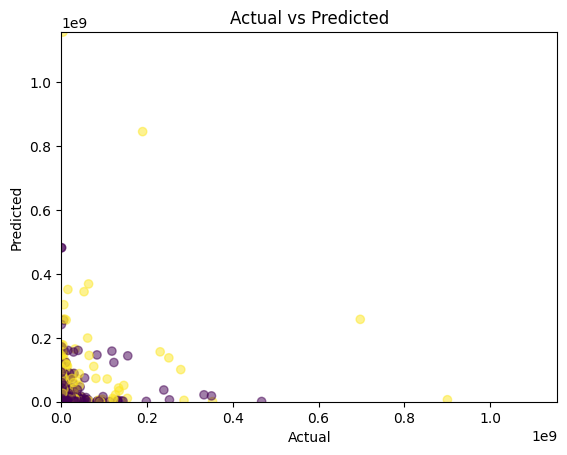

In [797]:
plt.scatter(y_test, y_pred, alpha=0.5, c=color_column_test, cmap='viridis')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

plt.xlim(0, max(max(y_test), max(y_pred)))
plt.ylim(0, max(max(y_test), max(y_pred)))

plt.show()

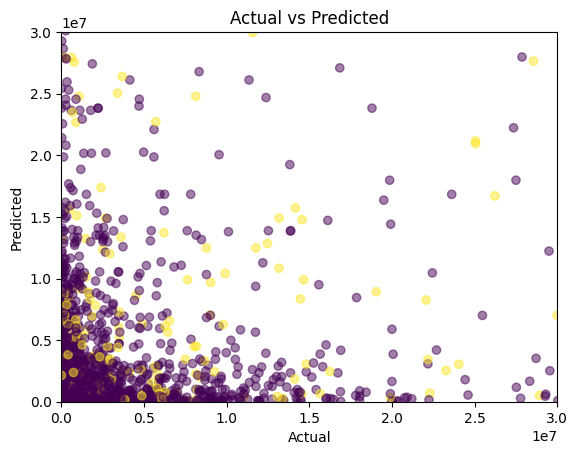

In [798]:
plt.scatter(y_test, y_pred, alpha=0.5, c=color_column_test, cmap='viridis')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

plt.xlim(0, 3*10**7)
plt.ylim(0, 3*10**7)

plt.show()

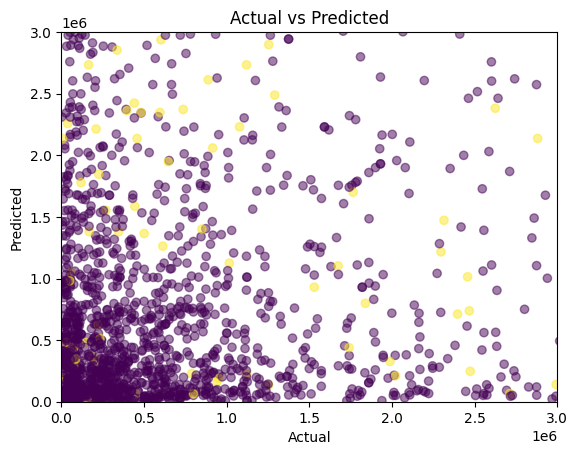

In [799]:
plt.scatter(y_test, y_pred, alpha=0.5, c=color_column_test, cmap='viridis')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

plt.xlim(0, 3*10**6)
plt.ylim(0, 3*10**6)

plt.show()

In [800]:
print(export_text(model, feature_names=feature_names))

|--- Dlugotrwale_bezrobotni <= 25668.00
|   |--- Bezrobotni_mezczyzni <= 19299.50
|   |   |--- Ludnosc_w_wieku_produkcyjnym <= 185983.00
|   |   |   |--- Turysci_zagraniczni <= 38.50
|   |   |   |   |--- Ludnosc_kobiety <= 89935.50
|   |   |   |   |   |--- Bezrobotni_powyzej_50_roku_zycia <= 340.75
|   |   |   |   |   |   |--- Turysci_ogolem <= 3.00
|   |   |   |   |   |   |   |--- Ludnosc_w_wieku_produkcyjnym_niemobilnym <= 3444.50
|   |   |   |   |   |   |   |   |--- Dochody_podatek_od_srodkow_transportowych <= 1364063.19
|   |   |   |   |   |   |   |   |   |--- Wynagrodzenie_w_relacji_do_sredniej <= 167.35
|   |   |   |   |   |   |   |   |   |   |--- Obiekty_ogolem <= 229.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 60
|   |   |   |   |   |   |   |   |   |   |--- Obiekty_ogolem >  229.00
|   |   |   |   |   |   |   |   |   |   |   |--- value: [83037656.42]
|   |   |   |   |   |   |   |   |   |--- Wynagrodzenie_w_relacji_do_sredniej >  167.35
|   |   

In [801]:
feature_importance = dict(zip(feature_names, model.feature_importances_))
for feature, importance in sorted(feature_importance.items(), key=lambda x: x[1], reverse=True):
    print(f'{importance:.5f} \u2014 {feature}')

0.60288 — Dlugotrwale_bezrobotni
0.13303 — Bezrobotni_mezczyzni
0.06044 — Ludnosc_w_wieku_produkcyjnym
0.02626 — Wynagrodzenie_w_relacji_do_sredniej
0.02598 — Turysci_ogolem
0.02175 — Wplywy_z_oplaty_eksploatacyjnej
0.01448 — Wymeldowania_na_wies_mezczyzni
0.01030 — Turysci_zagraniczni
0.01009 — Ludnosc_kobiety
0.00950 — Ludnosc_kobiety_w_wieku_poprodukcyjnym
0.00926 — Dochody_podatek_rolny
0.00725 — Dochody_podatek_lesny
0.00470 — Wplywy_z_oplaty_targowej
0.00468 — Dochody_z_najmu_i_dzierzawy
0.00453 — Saldo_migracji
0.00381 — Wymeldowania_na_wies_ogolem
0.00296 — Saldo_migracji_na_1000_ludnosci
0.00290 — Wynagrodzenie_ogolem
0.00288 — Ludnosc_kobiety_w_wieku_przedprodukcyjnym
0.00223 — Dochody_razem
0.00206 — Wplywy_z_innych_lokalnych_oplat
0.00193 — Zameldowania_kobiety
0.00190 — Dochody_podatek_od_spadkow
0.00180 — Wymeldowania_mezczyzni
0.00156 — Dochody_podatek_od_nieruchomosci
0.00156 — Wplywy_z_oplaty_skarbowej
0.00147 — Ludnosc_w_wieku_produkcyjnym_niemobilnym
0.00141 — Dochod